In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

Text(0.5, 1.0, 'Valores de treinamento')

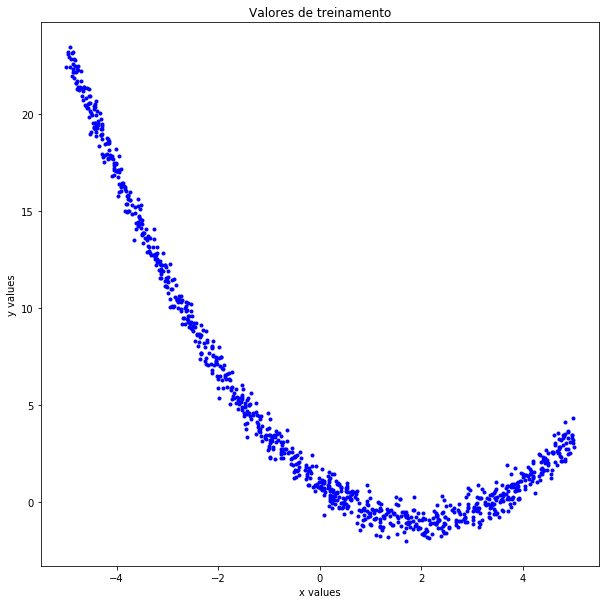

In [2]:
df = pd.read_csv('predicting.csv', header=None)
x_l = df[0].to_numpy() 
y_l = df[1].to_numpy()

arr1 = [x_l]
arr2 = [y_l]
x = np.transpose(arr1) 
y = np.transpose(arr2)
 
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Valores de treinamento')

In [3]:
M = 1000
np.random.seed(1234)
X = np.c_[np.ones((M, 1)), x, x**2]
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0] + a_opt[1, 0]*x + a_opt[2, 0]*x**2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2))

In [4]:
alpha = 0.007
n_iterations = 1000
a = np.zeros((3,1))
a[0] = -10;
a[1] = -10;
a[2] = -10;

Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

iteration = 0
while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    
    a = a - alpha * gradients
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    
    iteration = iteration + 1

In [5]:
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))
print('a2_opt: ' + str(a_opt[2, 0]))

print('a0_gd: ' + str(a[0, 0]))
print('a1_gd: ' + str(a[1, 0]))
print('a2_gd: ' + str(a[2, 0]))

a0_opt: 0.9609230616047597
a1_opt: -1.995948047062078
a2_opt: 0.5025273031737794
a0_gd: 0.9358460804080653
a1_gd: -1.995997496162698
a2_gd: 0.5041708846659502


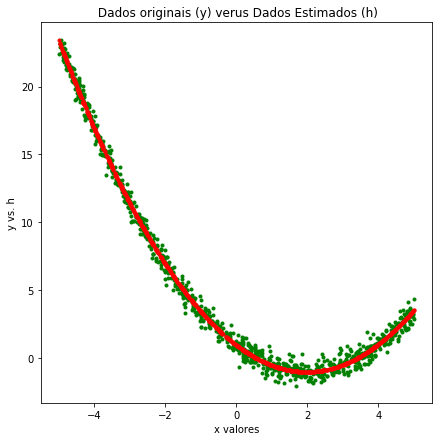

In [6]:
fig = plt.figure(figsize=(7,7))
plt.plot(x, y, 'g.')
plt.plot(x, yhat , 'r.')
plt.xlabel('x valores')
plt.ylabel('y vs. h')
plt.title(' Dados originais (y) verus Dados Estimados (h)')
plt.show()

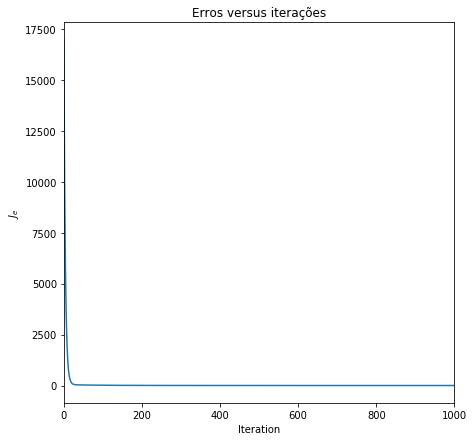

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Erros versus iterações')
plt.show()
plt.savefig("Erros_versus_iterações_item7_Predict2.png", dpi=600)